<a href="https://colab.research.google.com/github/ORIE5355/project_competition_public/blob/main/run_gym_headtohead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [812]:
import numpy as np 
import matplotlib.pyplot as plt
import time
from IPython import display

In [813]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [814]:
import make_env

In [866]:
project_part = 1
agentnames = ['ThreeHonestMerchant','evil']

In [867]:
if project_part == 1:
    env, agents = make_env.make_env_agents(agentnames = agentnames, project_part = project_part)
    
else:
    env, agents = make_env.make_env_agents(agentnames = agentnames, project_part = project_part
    , first_file = 'data/competitionsample_3', second_file='data/competitionsample_1')

# you can replace the agentnames to match whatever agentfiles you create. 
# you can use the same agentnames for both agents

In [868]:
T = 500

[autoreload of  failed: Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/miniconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/miniconda3/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/miniconda3/lib/python3.8/importlib/__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module ''
]


In [869]:
list_of_my_prices = []
list_of_valuations = []

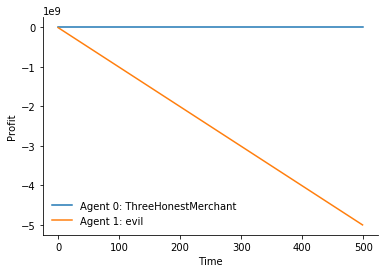

499
customer covariate:  [4.3625684980966755]
item bought: 0, agent bought from: 1, prices: [[4.361568498096675], [-10000000]]
current_profit per agent:  [0, -5000000000]

Cumulative buyer utility: 5000002820.299382


In [870]:
env.reset()
customer_covariates, sale, profits = env.get_current_state_customer_to_send_agents()
last_customer_covariates = customer_covariates

fig, ax = plt.subplots(figsize=(20, 10))
plt.title(T)
for t in range(0, T):
    actions = [agent.action((customer_covariates, sale, profits)) for agent in agents]
    customer_covariates, sale, profits = env.step(actions)
    newplot = env.render(True)
    if newplot:
      display.clear_output(wait=True)
      display.display(plt.gcf())
    print(t)
    print('customer covariate: ', last_customer_covariates)
    list_of_my_prices.append(sale[2][0])
    list_of_valuations.append(last_customer_covariates)
    print('item bought: {}, agent bought from: {}, prices: {}'.format(sale[0],sale[1],sale[2]))
    print('current_profit per agent: ', profits,end='\n\n')
    last_customer_covariates = customer_covariates
plt.close()
print("Cumulative buyer utility: {}".format(env.cumulative_buyer_utility))

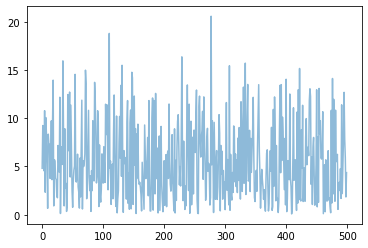

In [871]:
plt.plot(list_of_my_prices, alpha=0.5)

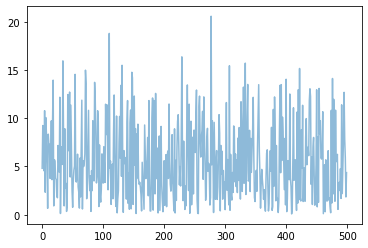

In [872]:
plt.plot(list_of_valuations, alpha=0.5)